# Notebook Description
This notebook provides the analysis of methylation clustering, Differential Methylation (DM) and Differential Methylation Locations (DMLs)

## Check and Set working location

In [150]:
getwd()

[1] "/Users/hputnam/MyProjects/Oly_Oyster_DNA_Methylation/Data/MBD/Bismark_Output/Coverage"

In [151]:
setwd("../Data/MBD/Bismark_Output/Coverage")

ERROR: Error in setwd("../Data/MBD/Bismark_Output/Coverage"): cannot change working directory


In [152]:
getwd()

[1] "/Users/hputnam/MyProjects/Oly_Oyster_DNA_Methylation/Data/MBD/Bismark_Output/Coverage"

## Install libraries

In [153]:
install.packages("Rcpp")


The downloaded binary packages are in
	/var/folders/49/t6xmj4zs6jj9fpzpltfp6rcm0000gp/T//RtmpBKrU5T/downloaded_packages


In [154]:
library(Rcpp)

In [155]:
#install.packages( c("data.table","devtools"))
source("http://bioconductor.org/biocLite.R")
biocLite(c("GenomicRanges","IRanges"))

Bioconductor version 3.3 (BiocInstaller 1.22.3), ?biocLite for help
A newer version of Bioconductor is available for this version of R,
  ?BiocUpgrade for help
BioC_mirror: https://bioconductor.org
Using Bioconductor 3.3 (BiocInstaller 1.22.3), R 3.3.1 (2016-06-21).
Installing package(s) ‘GenomicRanges’, ‘IRanges’



The downloaded binary packages are in
	/var/folders/49/t6xmj4zs6jj9fpzpltfp6rcm0000gp/T//RtmpBKrU5T/downloaded_packages


Old packages: 'BH', 'car', 'colorspace', 'curl', 'estimability', 'ggthemes',
  'git2r', 'hms', 'lsmeans', 'oce', 'repr', 'RSQLite', 'seacarb'


In [156]:
# install the development version from github
library(devtools)
install_github("al2na/methylKit", build_vignettes=FALSE, 
  repos=BiocInstaller::biocinstallRepos(),
  dependencies=TRUE)
library(methylKit)
library(graphics)


Skipping install of 'methylKit' from a github remote, the SHA1 (50f71b8e) has not changed since last install.
  Use `force = TRUE` to force installation


## Identify the list of methylkit format txt files from the output of BSMap

In [157]:
file.list <- list("zr1394_1_bismark_bt2.bismark.cov",
"zr1394_2_bismark_bt2.bismark.cov",
"zr1394_3_bismark_bt2.bismark.cov",
"zr1394_4_bismark_bt2.bismark.cov", 
"zr1394_5_bismark_bt2.bismark.cov",
"zr1394_6_bismark_bt2.bismark.cov",
"zr1394_7_bismark_bt2.bismark.cov", 
"zr1394_8_bismark_bt2.bismark.cov",
"zr1394_9_bismark_bt2.bismark.cov",
"zr1394_10_bismark_bt2.bismark.cov", 
"zr1394_11_bismark_bt2.bismark.cov",
"zr1394_12_bismark_bt2.bismark.cov", 
"zr1394_13_bismark_bt2.bismark.cov",
"zr1394_14_bismark_bt2.bismark.cov",
"zr1394_15_bismark_bt2.bismark.cov", 
"zr1394_16_bismark_bt2.bismark.cov",
"zr1394_17_bismark_bt2.bismark.cov",
"zr1394_18_bismark_bt2.bismark.cov")                  


## Identify the original sample IDs in the same order as the txt files

In [158]:
sample.id <- list("hc1_2B",
 "hc1_4B",
 "hc2_15B",
 "hc2_17",
 "hc3_1",
 "hc3_5",
 "hc3_7",
 "hc3_10",
 "hc3_11",
 "ss2_9B",
 "ss2_14B",
 "ss2_18B",
 "ss3_3B",
 "ss3_14B",
 "ss3_15B",
 "ss3_16B",
 "ss3_20",
 "ss5_18")

## Identify the populations by 0=HC and 1=SS for use as the "treatment" variable in methylkit

In [159]:
treatment <- c(0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1)

In [160]:
file.list

[[1]]
[1] "zr1394_1_bismark_bt2.bismark.cov"

[[2]]
[1] "zr1394_2_bismark_bt2.bismark.cov"

[[3]]
[1] "zr1394_3_bismark_bt2.bismark.cov"

[[4]]
[1] "zr1394_4_bismark_bt2.bismark.cov"

[[5]]
[1] "zr1394_5_bismark_bt2.bismark.cov"

[[6]]
[1] "zr1394_6_bismark_bt2.bismark.cov"

[[7]]
[1] "zr1394_7_bismark_bt2.bismark.cov"

[[8]]
[1] "zr1394_8_bismark_bt2.bismark.cov"

[[9]]
[1] "zr1394_9_bismark_bt2.bismark.cov"

[[10]]
[1] "zr1394_10_bismark_bt2.bismark.cov"

[[11]]
[1] "zr1394_11_bismark_bt2.bismark.cov"

[[12]]
[1] "zr1394_12_bismark_bt2.bismark.cov"

[[13]]
[1] "zr1394_13_bismark_bt2.bismark.cov"

[[14]]
[1] "zr1394_14_bismark_bt2.bismark.cov"

[[15]]
[1] "zr1394_15_bismark_bt2.bismark.cov"

[[16]]
[1] "zr1394_16_bismark_bt2.bismark.cov"

[[17]]
[1] "zr1394_17_bismark_bt2.bismark.cov"

[[18]]
[1] "zr1394_18_bismark_bt2.bismark.cov"

In [161]:
sample.id

[[1]]
[1] "hc1_2B"

[[2]]
[1] "hc1_4B"

[[3]]
[1] "hc2_15B"

[[4]]
[1] "hc2_17"

[[5]]
[1] "hc3_1"

[[6]]
[1] "hc3_5"

[[7]]
[1] "hc3_7"

[[8]]
[1] "hc3_10"

[[9]]
[1] "hc3_11"

[[10]]
[1] "ss2_9B"

[[11]]
[1] "ss2_14B"

[[12]]
[1] "ss2_18B"

[[13]]
[1] "ss3_3B"

[[14]]
[1] "ss3_14B"

[[15]]
[1] "ss3_15B"

[[16]]
[1] "ss3_16B"

[[17]]
[1] "ss3_20"

[[18]]
[1] "ss5_18"

In [162]:
str(treatment)

 num [1:18] 0 0 0 0 0 0 0 0 0 1 ...


## Read in all sample files, sample IDs, and treatment info along with assembly version to make a methylRawList object

In [163]:
testmyobj=methRead( file.list[[1]], sample.id="test1", assembly="test", mincov = 3, pipeline='bismarkCoverage', context="CpG")

In [164]:
head(testmyobj)

chr,start,end,strand,coverage,numCs,numTs
scaffold8,4228,4228,*,4,3,1
scaffold8,4290,4290,*,14,6,8
scaffold8,4306,4306,*,14,3,11
scaffold8,4307,4307,*,3,0,3
scaffold8,4467,4467,*,3,1,2
scaffold8,4468,4468,*,3,0,3


In [165]:
myobj=methRead(file.list, sample.id, assembly="10K", treatment=treatment, mincov = 3, pipeline='bismarkCoverage', context="CpG")

### Filter data to remove low coverage (< X) and high coverage (> XX percentile)

In [166]:
 filtered.myobj <- filterByCoverage(myobj, lo.count = 5, lo.perc = NULL, hi.count = NULL, hi.perc = 95)

In [167]:
dim(filtered.myobj[[1]])

[1] 144074      7

In [168]:
head(filtered.myobj[[1]])

,chr,start,end,strand,coverage,numCs,numTs
2,scaffold8,4290,4290,*,14,6,8
3,scaffold8,4306,4306,*,14,3,11
13,scaffold44,3238,3238,*,6,4,2
15,scaffold44,3248,3248,*,5,1,4
19,scaffold44,3301,3301,*,6,5,1
20,scaffold44,3302,3302,*,5,5,0


## View histograms of methylation per base and coverage of methylation data 

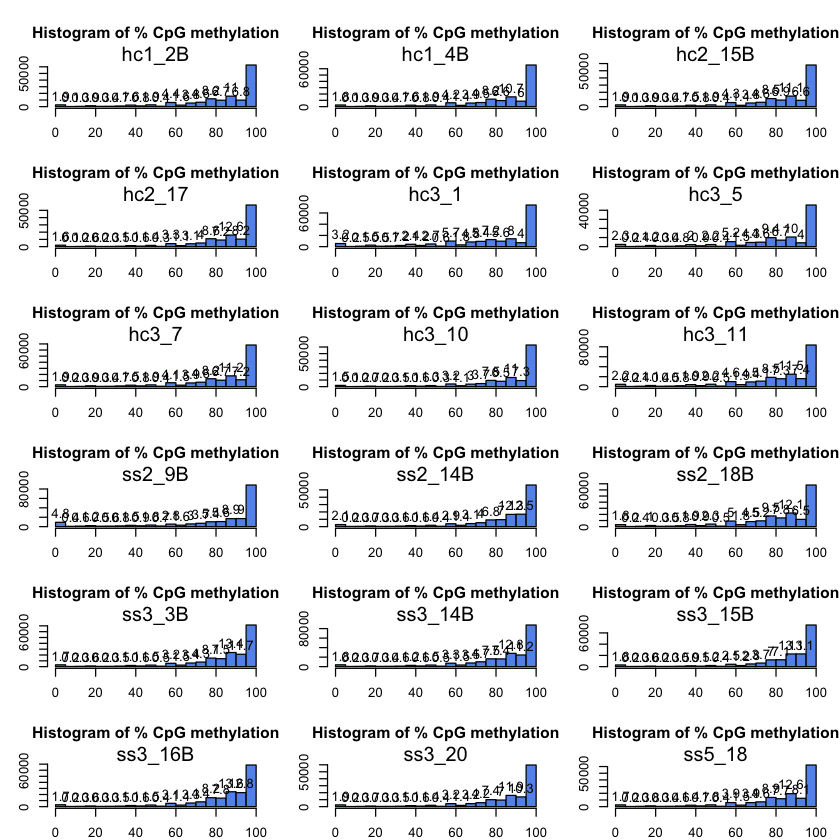

In [169]:
par(mfrow=c(6,3))
par(mar=c(2, 3, 4, 1))
getMethylationStats(filtered.myobj[[1]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[2]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[3]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[4]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[5]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[6]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[7]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[8]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[9]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[10]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[11]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[12]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[13]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[14]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[15]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[16]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[17]], plot = T, both.strands = F)
getMethylationStats(filtered.myobj[[18]], plot = T, both.strands = F)

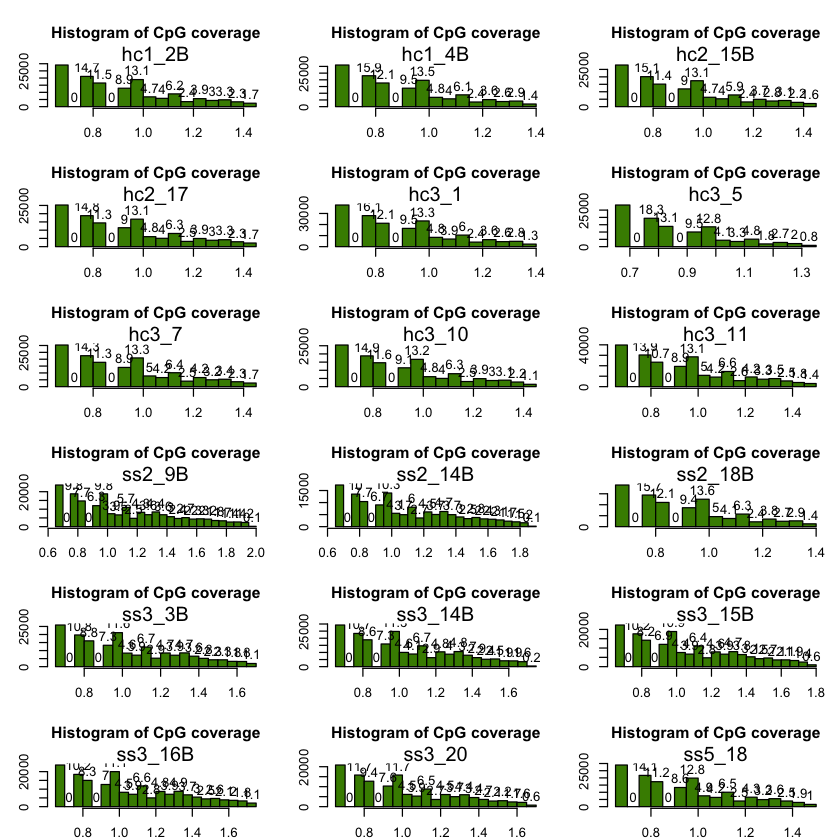

In [170]:
par(mfrow=c(6,3))
par(mar=c(2, 3, 4, 1))
getCoverageStats(filtered.myobj[[1]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[2]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[3]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[4]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[5]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[6]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[7]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[8]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[9]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[10]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[11]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[12]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[13]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[14]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[15]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[16]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[17]], plot = T, both.strands = F)
getCoverageStats(filtered.myobj[[18]], plot = T, both.strands = F)

## Merge samples into a single object to obtain loci covered in all samples for statistical comparison. Use destrand=T if CpG context only to merge reads on both strands and increase coverage

In [171]:
meth <- unite(filtered.myobj, destrand=F)

In [172]:
head(meth)

In [173]:
dim(meth)

[1] 11408    58

## Calculate the correlation in methylation between samples

In [174]:
getCorrelation(meth, plot = F)

           hc1_2B    hc1_4B   hc2_15B    hc2_17     hc3_1     hc3_5     hc3_7
hc1_2B  1.0000000 0.5839849 0.5857825 0.6076468 0.5617237 0.5977796 0.5909828
hc1_4B  0.5839849 1.0000000 0.5690948 0.5974087 0.5442419 0.5297174 0.5886175
hc2_15B 0.5857825 0.5690948 1.0000000 0.6181792 0.5506009 0.5348259 0.6099541
hc2_17  0.6076468 0.5974087 0.6181792 1.0000000 0.5591090 0.5642255 0.6167602
hc3_1   0.5617237 0.5442419 0.5506009 0.5591090 1.0000000 0.5224271 0.5877427
hc3_5   0.5977796 0.5297174 0.5348259 0.5642255 0.5224271 1.0000000 0.5423239
hc3_7   0.5909828 0.5886175 0.6099541 0.6167602 0.5877427 0.5423239 1.0000000
hc3_10  0.5878845 0.5638826 0.5727906 0.6114593 0.5238026 0.5586750 0.5825402
hc3_11  0.6180263 0.5838020 0.6008727 0.6156097 0.5741180 0.5678431 0.6184316
ss2_9B  0.5842258 0.5623122 0.5668207 0.5929075 0.5126294 0.5339350 0.5706462
ss2_14B 0.6071112 0.5707818 0.5809897 0.6039747 0.5375084 0.5486631 0.5883585
ss2_18B 0.5739740 0.5758441 0.5664995 0.5851161 0.5567303 0.5527

## Cluster samples based on the similarity of their methylation profiles using Wards D

In [175]:
CpG.Dendro <- clusterSamples(meth, dist="correlation", method="ward", plot=F)

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


The "ward" method has been renamed to "ward.D"; note new "ward.D2"


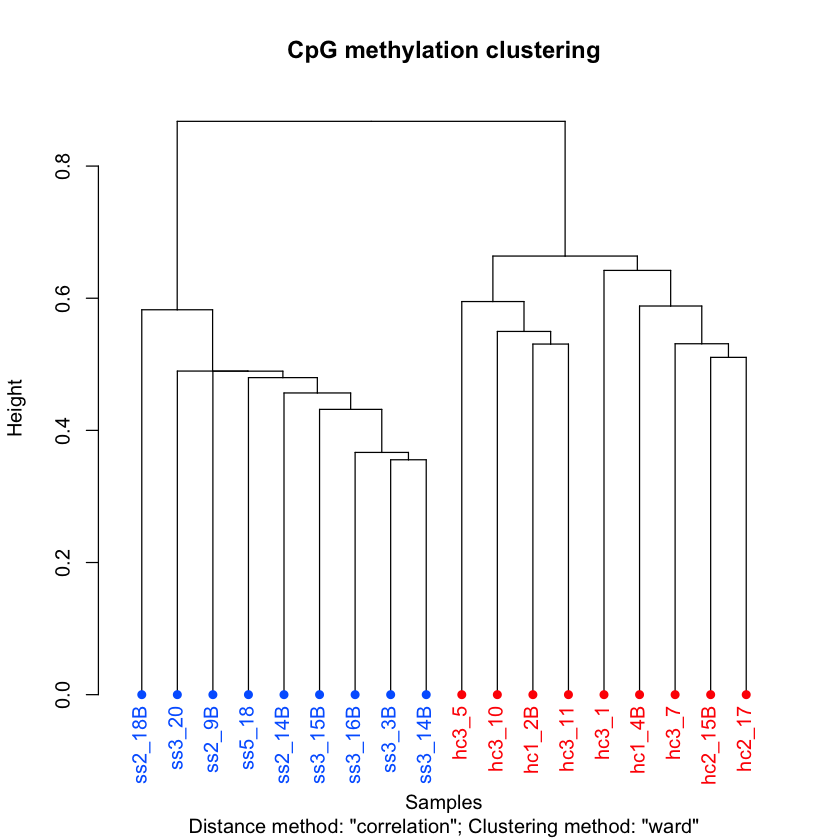

In [176]:
Clusters <- clusterSamples(meth, dist="correlation", method="ward", plot=T)

## Run principal component analysis (PCA) and plot PCA graphic and screeplot 

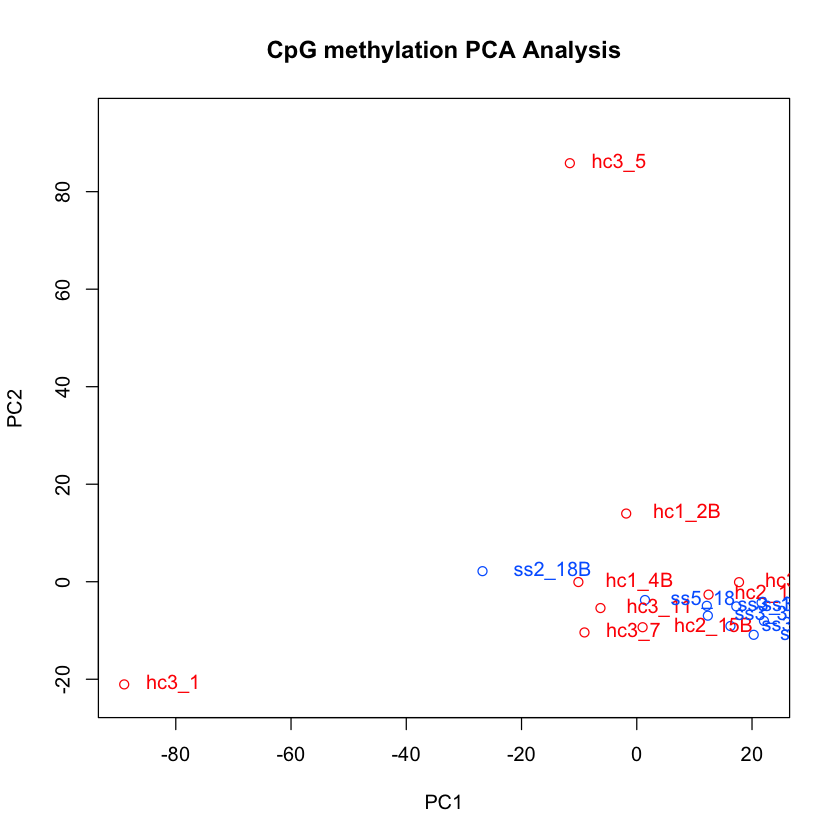

In [177]:
PCA <-PCASamples(meth, scale=T, center=T)

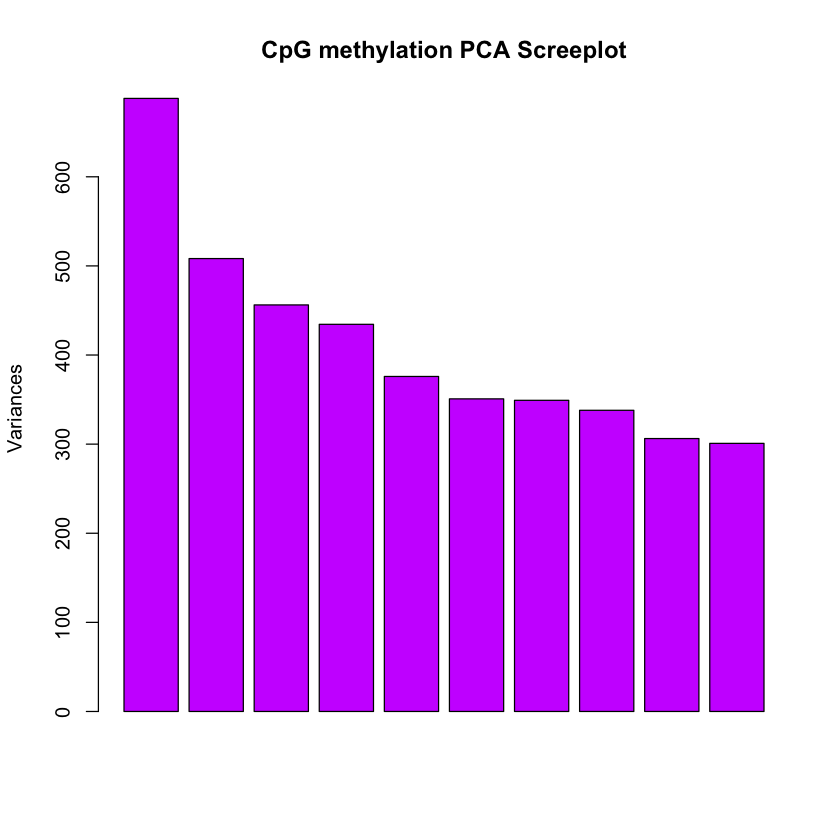

In [178]:
PCASamples(meth, screeplot = TRUE)

## Identify the CpG context DMLs specific to SS or HC 

In [94]:
write.csv(meth, file="Pop.DML")

## Pool replicates within groups to a single sample per group - sums up coverage, numCs and numTs values within each group so one representative sample for each group will be created in a new methylBase object

In [95]:
pop.pooled <- pool(meth, sample.ids = c("HC", "SS"))

In [96]:
dim(pop.pooled)

[1] 6214   10

In [97]:
str(pop.pooled)

'data.frame':	6214 obs. of  10 variables:
Formal class 'methylBase' [package "methylKit"] with 13 slots
  ..@ .Data         :List of 10
  .. ..$ : Factor w/ 1009 levels "scaffold1002",..: 1 2 2 2 2 2 2 2 2 2 ...
  .. ..$ : int  11859 1244 1266 13411 13415 13420 13429 13434 13438 13522 ...
  .. ..$ : int  11859 1244 1266 13411 13415 13420 13429 13434 13438 13522 ...
  .. ..$ : Factor w/ 1 level "+": 1 1 1 1 1 1 1 1 1 1 ...
  .. ..$ : num  2310 142 170 705 804 930 863 880 846 412 ...
  .. ..$ : num  1850 22 127 491 454 813 639 500 530 291 ...
  .. ..$ : num  460 120 43 214 350 117 224 380 316 121 ...
  .. ..$ : num  3232 385 368 972 1106 ...
  .. ..$ : num  2579 50 300 614 739 ...
  .. ..$ : num  653 335 68 358 367 155 308 438 552 96 ...
  ..@ sample.ids    : chr  "HC" "SS"
  ..@ assembly      : chr "10K"
  ..@ context       : chr "CpG"
  ..@ treatment     : num  0 1
  ..@ coverage.index: num  5 8
  ..@ numCs.index   : num  6 9
  ..@ numTs.index   : num  7 10
  ..@ destranded    : logi F

In [98]:
head(pop.pooled)

chr,start,end,strand,coverage1,numCs1,numTs1,coverage2,numCs2,numTs2
scaffold1002,11859,11859,+,2310,1850,460,3232,2579,653
scaffold1004,1244,1244,+,142,22,120,385,50,335
scaffold1004,1266,1266,+,170,127,43,368,300,68
scaffold1004,13411,13411,+,705,491,214,972,614,358
scaffold1004,13415,13415,+,804,454,350,1106,739,367
scaffold1004,13420,13420,+,930,813,117,1294,1139,155


## Calculate % methylation for all and pooled by population HC and SS and format for viewing in IGV

In [99]:
Pops_CpGs <- as.data.frame(pop.pooled)

In [100]:
Pops_CpGs$CpG <- "CpG"

In [101]:
Pops_CpGs$start <- as.numeric(Pops_CpGs$start)

In [102]:
Pops_CpGs$end <- as.numeric(Pops_CpGs$end)

In [103]:
Pops_CpGs$end <- Pops_CpGs$start+1

In [104]:
Pops_CpGs$HC_Percent_Meth <- as.numeric(Pops_CpGs$numCs1)/(as.numeric(Pops_CpGs$numCs1)+as.numeric(Pops_CpGs$numTs1))

In [105]:
Pops_CpGs$SS_Percent_Meth <- as.numeric(Pops_CpGs$numCs2)/(as.numeric(Pops_CpGs$numCs2)+as.numeric(Pops_CpGs$numTs2))

In [106]:
Pops_CpGs <- Pops_CpGs[order(Pops_CpGs$chr,Pops_CpGs$start),]

In [107]:
head(Pops_CpGs)

chr,start,end,strand,coverage1,numCs1,numTs1,coverage2,numCs2,numTs2,CpG,HC_Percent_Meth,SS_Percent_Meth
scaffold1002,11859,11860,+,2310,1850,460,3232,2579,653,CpG,0.8008658,0.7979579
scaffold1004,1244,1245,+,142,22,120,385,50,335,CpG,0.1549296,0.1298701
scaffold1004,1266,1267,+,170,127,43,368,300,68,CpG,0.7470588,0.8152174
scaffold1004,13411,13412,+,705,491,214,972,614,358,CpG,0.6964539,0.6316872
scaffold1004,13415,13416,+,804,454,350,1106,739,367,CpG,0.5646766,0.6681736
scaffold1004,13420,13421,+,930,813,117,1294,1139,155,CpG,0.8741935,0.8802164


In [108]:
HC_CpG <- cbind(as.character(Pops_CpGs$chr), Pops_CpGs$start, Pops_CpGs$end, Pops_CpGs$CpG, Pops_CpGs$HC_Percent_Meth)

In [109]:
head(HC_CpG)

scaffold1002,11859,11860,CpG,0.800865800865801
scaffold1004,1244,1245,CpG,0.154929577464789
scaffold1004,1266,1267,CpG,0.747058823529412
scaffold1004,13411,13412,CpG,0.69645390070922
scaffold1004,13415,13416,CpG,0.564676616915423
scaffold1004,13420,13421,CpG,0.874193548387097


In [110]:
SS_CpG <- cbind(as.character(Pops_CpGs$chr), Pops_CpGs$start, Pops_CpGs$end, Pops_CpGs$CpG, Pops_CpGs$SS_Percent_Meth)

In [111]:
head(SS_CpG)

scaffold1002,11859,11860,CpG,0.797957920792079
scaffold1004,1244,1245,CpG,0.12987012987013
scaffold1004,1266,1267,CpG,0.815217391304348
scaffold1004,13411,13412,CpG,0.631687242798354
scaffold1004,13415,13416,CpG,0.668173598553345
scaffold1004,13420,13421,CpG,0.880216383307573


In [112]:
tail(SS_CpG)

"[6209,]",scaffold992,11661,11662,CpG,0.546840958605665
"[6210,]",scaffold992,14598,14599,CpG,0.00302571860816944
"[6211,]",scaffold992,14607,14608,CpG,0.0029585798816568
"[6212,]",scaffold992,14618,14619,CpG,0.00567375886524823
"[6213,]",scaffold992,14772,14773,CpG,0.125412541254125
"[6214,]",scaffold992,14792,14793,CpG,0


In [113]:
write.table(HC_CpG, "HC_CpG.igv", sep="\t", quote=F, col.names=F, row.names=F)

In [114]:
write.table(SS_CpG, "SS_CpG.igv", sep="\t", quote=F, col.names=F, row.names=F)

In [115]:
write.csv(pop.pooled, file="DMLs_rep_Pop")

## Test for separation in methylation profiles between populations

In [116]:
pop.DML.fisher <- calculateDiffMeth(pop.pooled)

In [117]:
head(pop.DML.fisher)

chr,start,end,strand,pvalue,qvalue,meth.diff
scaffold1002,11859,11859,+,8.118758e-01,7.348222e-01,-0.2907880
scaffold1004,1244,1244,+,4.758942e-01,5.559271e-01,-2.5059448
scaffold1004,1266,1266,+,8.525366e-02,1.903646e-01,6.8158568
scaffold1004,13411,13411,+,5.726961e-03,2.689455e-02,-6.4766658
scaffold1004,13415,13415,+,4.312404e-06,7.505892e-05,10.3496982
scaffold1004,13420,13420,+,6.939887e-01,6.765131e-01,0.6022835


## Filter the significant DML data for q values < 0.01 and methylation difference between populations with an absolute value of 10 (hyper and hypo methylated)

In [118]:
pop.DML.filt <- pop.DML.fisher[pop.DML.fisher$qvalue < 0.01 & pop.DML.fisher$meth.diff>10 | pop.DML.fisher$meth.diff<(-10),]

In [119]:
dim(pop.DML.filt)

[1] 374   7

In [120]:
head(pop.DML.filt)

,chr,start,end,strand,pvalue,qvalue,meth.diff
5,scaffold1004,13415,13415,+,4.312404e-06,7.505892e-05,10.34970
20,scaffold1023,15910,15910,+,9.454703e-04,6.577608e-03,14.46462
38,scaffold1036,9565,9565,+,7.703240e-11,4.193823e-09,12.29936
39,scaffold1036,9574,9574,+,1.130414e-11,7.250197e-10,14.10498
41,scaffold1036,9586,9586,+,7.085878e-13,5.529395e-11,14.05604
42,scaffold1036,9595,9595,+,1.417745e-16,2.011497e-14,17.97699


In [121]:
write.csv(pop.DML.filt, file="pop.DML.filt_0.01_abs10")

## Filter the significant DML data for q values < 0.01 and methylation difference between populations with a value of > 10 (hyper methylated)

In [122]:
pop.DML.filt_hyper <- pop.DML.filt[pop.DML.filt$qvalue < 0.01 & pop.DML.filt$meth.diff > 10,]

In [123]:
#write.csv(pop.DML.filt, file="Pop_DML_filt_0.01_10")
dim(pop.DML.filt_hyper)

[1] 251   7

In [124]:
head(pop.DML.filt_hyper)

,chr,start,end,strand,pvalue,qvalue,meth.diff
5,scaffold1004,13415,13415,+,4.312404e-06,7.505892e-05,10.34970
20,scaffold1023,15910,15910,+,9.454703e-04,6.577608e-03,14.46462
38,scaffold1036,9565,9565,+,7.703240e-11,4.193823e-09,12.29936
39,scaffold1036,9574,9574,+,1.130414e-11,7.250197e-10,14.10498
41,scaffold1036,9586,9586,+,7.085878e-13,5.529395e-11,14.05604
42,scaffold1036,9595,9595,+,1.417745e-16,2.011497e-14,17.97699


In [125]:
write.csv(pop.DML.filt_hyper, file="pop.DML.filt_0.01_>10")

## Filter the significant DML data for q values < 0.01 and methylation difference between populations with a value of < -10 (hypo methylated)

In [126]:
pop.DML.filt_hypo <- pop.DML.filt[pop.DML.filt$qvalue < 0.01 & pop.DML.filt$meth.diff < (-10),]

In [127]:
#write.csv(pop.DML.filt, file="Pop_DML_filt_0.01_10")
dim(pop.DML.filt_hypo)

[1] 91  7

In [128]:
head(pop.DML.filt_hypo)

,chr,start,end,strand,pvalue,qvalue,meth.diff
62,scaffold1036,14467,14467,+,1.871511e-07,4.841155e-06,-10.07461
179,scaffold1162,8211,8211,+,2.194616e-09,9.013403e-08,-10.10877
275,scaffold1248,1047,1047,+,1.105190e-05,1.674609e-04,-18.56003
427,scaffold144,1681,1681,+,6.214080e-08,1.939638e-06,-19.00108
428,scaffold144,1685,1685,+,8.966620e-12,5.912969e-10,-23.92080
430,scaffold144,1751,1751,+,1.087721e-11,7.073266e-10,-10.00877


In [129]:
write.csv(pop.DML.filt_hypo, file="pop.DML.filt_0.01_<-10")